Jupyter notebook has evolved slowly over many years (it used to be called Ipython notebook). As a result, there are some weird things like %matplotlib inline. You need to run it before anything else if you want to plot. Currently a major reimplementation of Jupyter notebook is underway called Jupyter Lab. When that comes out, weird things like this will probably go away.

In [1]:
%matplotlib inline

This is a list of imports together with their conventional short names. Numpy is an efficent array library. Pandas is a dataframe library (the Python analogue of an excel spreadsheet). Matplotlib.pyplot is the python frontend for matplotlib. Seaborn is a wrapper around Matplotlib.pyplot to make it look a little nicer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reading in a CSV file into a pandas data frame.

In [3]:
data = pd.read_csv("./.kaggle_data/Rdatasets/women.csv").drop("Unnamed: 0",axis=1)

In [4]:
data.head()

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


Nothing fancy is required to fit a regression line to data. There is a closed formula for the slope and intercept. However, for more complicated regression problems (like classifying digits from bitmaps), there is no closed formula and the loss function we are trying to minimize might not be convex. In these cases, we can use [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) to minimize the loss function. One of the most important things to know about gradient descent is that it works best when all of your data is normalized into a small box around the origin. This is because the gradient is not invariant under linear changes of coordinates. The following code just normalizes our data so that gradient descent works better.

In [5]:
height = np.float32(data["height"].values)
height_mean = height.mean()
height_std = height.std()
height_normalized = (height -height_mean) / height_std

weight = np.float32(data["weight"].values)
weight_mean = weight.mean()
weight_std = weight.std()
weight_normalized = (weight - weight_mean) / weight_std

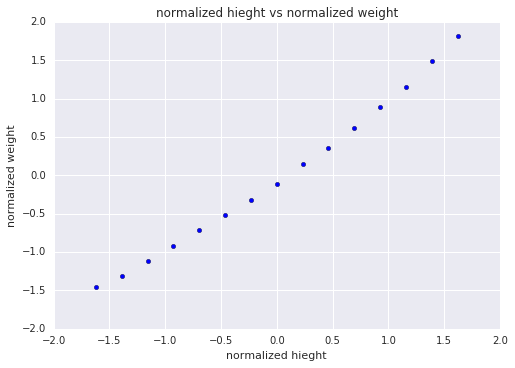

In [6]:
plt.scatter(height_normalized,weight_normalized)
plt.xlabel("normalized hieght")
plt.ylabel("normalized weight")
plt.title("normalized hieght vs normalized weight")
plt.show()

Implementing gradient descent by hand is not very hard, but making it run fast is. Google recently released a library called tensorflow which is designed for doing gradient descent in high dimensional spaces. It is fast, easy to use and will be supported for a long time.

In [7]:
import tensorflow as tf

In [8]:
linear_regression = tf.Graph()
with linear_regression.as_default():
    x = tf.placeholder(tf.float32,shape=None)
    y_ = tf.placeholder(tf.float32,shape=None)
    w = tf.Variable(0.1)
    b = tf.Variable(0.0)
    y = w * x + b
    loss = tf.reduce_mean(tf.square(y - y_))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [9]:
with tf.Session(graph=linear_regression) as session:
    tf.initialize_all_variables().run()
    feed_dict = {x : height_normalized , y_ : weight_normalized}
    for step in range(5):
        _,l = session.run([train_step,loss],feed_dict=feed_dict)
        print("loss = %f" % l)
    slope,intercept = session.run([w,b])
    print("slope = %f" % slope)
    print("intercept = %f" % intercept)

loss = 0.810901
loss = 0.008990
loss = 0.008990
loss = 0.008990
loss = 0.008990
slope = 0.995495
intercept = -0.000000


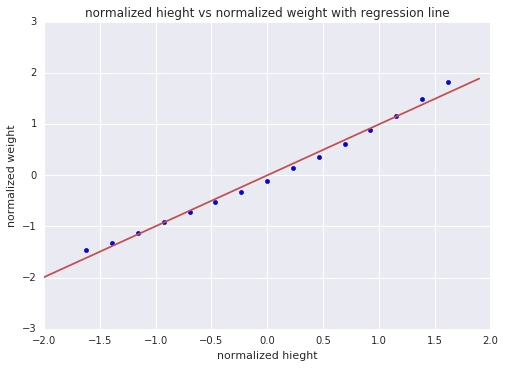

In [10]:
colors = sns.color_palette()
plt.scatter(height_normalized,weight_normalized)
plt.plot(np.arange(-2,2,0.1),0.995495 * np.arange(-2,2,0.1),color = colors[2])
plt.xlabel("normalized hieght")
plt.ylabel("normalized weight")
plt.xlim(-2,2)
plt.title("normalized hieght vs normalized weight with regression line")
plt.show()